# HW4
We will be working on a very cool problem which is classifying hand signs. In each image the hand is holding certain number of fingers up. The number of fingers held by the hand is the class number. The original dataset is in a format call h5 format. It is an efficient format to store and organize large amounts of data. [Click here to read more about it](https://en.wikipedia.org/wiki/Hierarchical_Data_Format). The following function `load_dataset()` is ready for you to use. It will return four variables in the following order: X_train, Y_train, X_test, Y_test. Hence, your data is already splitted and there is no need for you to split it.

You can download the training datafile here https://drive.google.com/open?id=1vcbjJMj4RuuuqayUu40ScHJdSY4DZOrj

You can download the test datafile here https://drive.google.com/open?id=1rQ1RCIBzw7ho_n6x0vbMzdZ8fAzi1hIQ

Make sure you have both on the same directory as your notebook

In [1]:
# import libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import h5py

def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0]),1)
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0],1))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

Using TensorFlow backend.


load the dataset 

In [2]:
#load your dataset here

# initialize train and test data with given function
x_train, y_train, x_test, y_test = load_dataset()

Generate 20 random numbers between 0 and the length of the training dataset. Plot 20 images from the dataset using these 20 random numbers as indicies to the training dataset. You will need to plot them on 5 rows and 4 columns. In addition, each image will have a title that says `this image belons to class number X`, replace X by the correct class number from the training labels.

<Figure size 3600x2880 with 0 Axes>

Text(0.5, 1.0, 'This image belongs to class number [3]')

Text(0.5, 1.0, 'This image belongs to class number [5]')

Text(0.5, 1.0, 'This image belongs to class number [5]')

Text(0.5, 1.0, 'This image belongs to class number [0]')

Text(0.5, 1.0, 'This image belongs to class number [5]')

Text(0.5, 1.0, 'This image belongs to class number [3]')

Text(0.5, 1.0, 'This image belongs to class number [4]')

Text(0.5, 1.0, 'This image belongs to class number [1]')

Text(0.5, 1.0, 'This image belongs to class number [5]')

Text(0.5, 1.0, 'This image belongs to class number [5]')

Text(0.5, 1.0, 'This image belongs to class number [2]')

Text(0.5, 1.0, 'This image belongs to class number [4]')

Text(0.5, 1.0, 'This image belongs to class number [4]')

Text(0.5, 1.0, 'This image belongs to class number [2]')

Text(0.5, 1.0, 'This image belongs to class number [3]')

Text(0.5, 1.0, 'This image belongs to class number [1]')

Text(0.5, 1.0, 'This image belongs to class number [4]')

Text(0.5, 1.0, 'This image belongs to class number [3]')

Text(0.5, 1.0, 'This image belongs to class number [2]')

Text(0.5, 1.0, 'This image belongs to class number [3]')

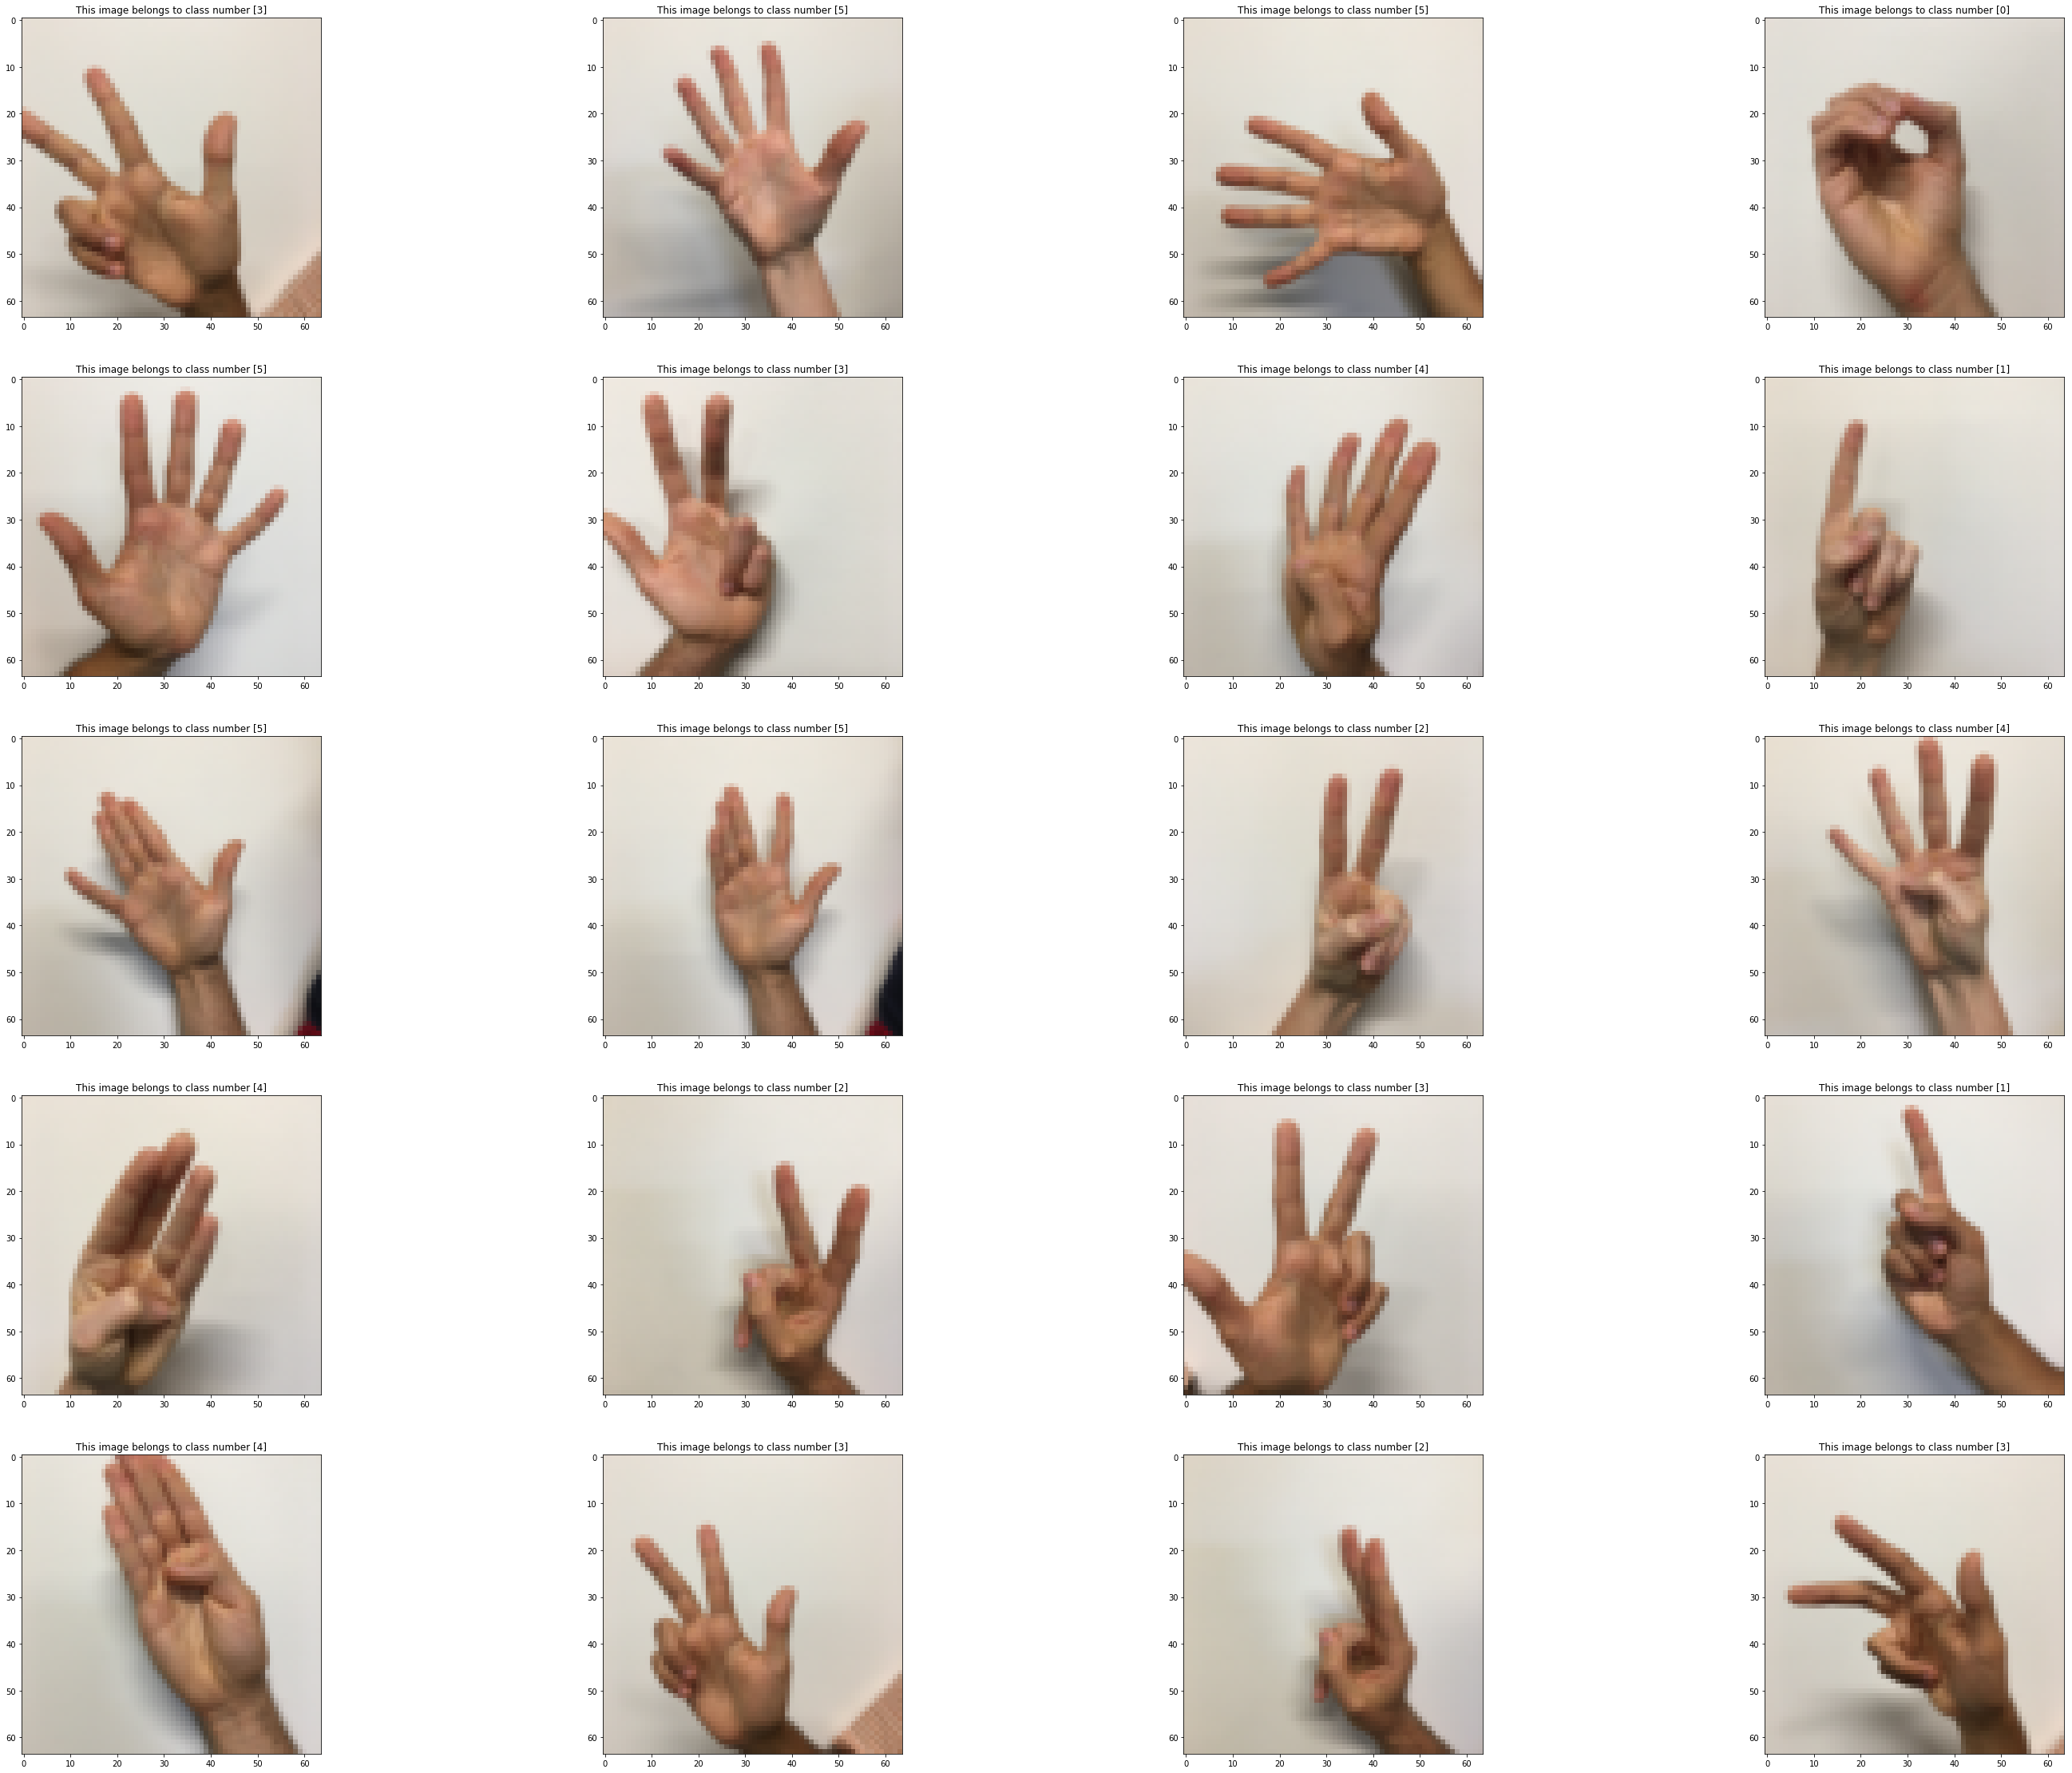

In [3]:
# Plot here

# generate 20 random integers for the plots
rand = np.random.randint(low=0, high=len(x_train)-1, size=20).tolist()
plt.figure(figsize=(50,40))

# loop to iterate through the list and plot images
for i in rand:
    plt.subplot(5,4, rand.index(i)+1)
    plt.imshow(x_train[i])
    plt.title('This image belongs to class number {}'.format(y_train[i]))
    
# double click image plots to enlarge

How many classes does the training and test dataset have?

In [4]:
# solve here

# unique class values and count for training labels
np.unique(y_train)
len(np.unique(y_train))

# unique class values and count for testing labels
np.unique(y_test)
len(np.unique(y_test))

array([0, 1, 2, 3, 4, 5], dtype=int64)

6

array([0, 1, 2, 3, 4, 5], dtype=int64)

6

What is the dimension of the training dataset and test dataset?

In [5]:
# solve here

# check the dimensions or the train and test set
x_train_dim = x_train.shape
x_test_dim = x_test.shape
x_train_dim
x_test_dim
y_train.shape
y_test.shape

(1080, 64, 64, 3)

(120, 64, 64, 3)

(1080, 1)

(120, 1)

As you can see in the dimension (number_images X length X width X RGB), each image has 3 dimensions .. number of pixels in length and width as well as RGB contrast. We needed to flatten both the training and the test dataset so that we can feed to our ML models. To flatten an image, check the following link. https://stackoverflow.com/questions/36967920/numpy-flatten-rgb-image-array

In [6]:
# solve here

# caluclate the new width for train and test data
x_train_dim_wid = x_train_dim[1]*x_train_dim[2]*x_train_dim[3]
x_test_dim_wid = x_test_dim[1]*x_test_dim[2]*x_test_dim[3]

# flatten and reshape train and test data
x_train_pix = x_train.flatten().reshape(x_train_dim[0], x_train_dim_wid)
x_test_pix = x_test.flatten().reshape(x_test_dim[0], x_test_dim_wid)

# verify the reshaped dimensions
x_train_pix.shape
x_test_pix.shape

(1080, 12288)

(120, 12288)

Now we need to normalize the training and test dataset. The pixels are integers. We need them to be float between 0 and 1. You need to divide each of the two matrices by its max. That will produce a normalized image datasets

In [7]:
# Solve Here

# divide matrices by respective max
x_train_pix = x_train_pix/x_train_pix.max()
x_test_pix = x_test_pix/x_test_pix.max()

# verify the change to floats between 0 and 1
x_train_pix.shape
x_test_pix.shape
y_train.shape
y_test.shape

(1080, 12288)

(120, 12288)

(1080, 1)

(120, 1)

Now you can apply ML. Start with a baseline model such as logistic regression. Fit the model, then evaluate the model by calculating the accuracy and the confusion matrix for the training data and test data. Note, fitting the model may take longer than a minute

In [8]:
# Solve here
logreg = LogisticRegression().fit(x_train_pix, y_train)

# predict values, calculate accuracy, and create confusion matrix for train and test
train_pred = logreg.predict(x_train_pix)
test_pred = logreg.predict(x_test_pix)

metrics.accuracy_score(y_train, train_pred)
metrics.accuracy_score(y_test, test_pred)

metrics.confusion_matrix(y_train, train_pred)
metrics.confusion_matrix(y_test, test_pred)

E:\Users\Dhyan Gandhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Users\Dhyan Gandhi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Users\Dhyan Gandhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1.0

0.8916666666666667

array([[180,   0,   0,   0,   0,   0],
       [  0, 180,   0,   0,   0,   0],
       [  0,   0, 180,   0,   0,   0],
       [  0,   0,   0, 180,   0,   0],
       [  0,   0,   0,   0, 180,   0],
       [  0,   0,   0,   0,   0, 180]], dtype=int64)

array([[20,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0],
       [ 0,  1, 18,  1,  0,  0],
       [ 1,  0,  0, 18,  0,  1],
       [ 0,  0,  2,  1, 14,  3],
       [ 0,  0,  1,  1,  1, 17]], dtype=int64)

Use Keras to build a small neural network. Number of hidden layers is less than 5 and each layer should have between 5 and 10 neurons. The loss for a multiclass keras problem is called `categorical_crossentropy`

**Note**: You will need to convert the labels using the one hot class encoder as we did in the lecture

In [9]:
# Solve Here
# prepare data for tensorflow multi labels
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(y_train)

# 3. Transform
onehotlabels_train = enc.transform(y_train).toarray()
onehotlabels_test = enc.transform(y_test).toarray()

from keras.models import Sequential
from keras.layers import Dense
# create model
model = Sequential()
model.add(Dense(6, input_shape = (x_train_pix.shape[1],), activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_pix, onehotlabels_train, epochs=100, batch_size=10, \
          validation_data=(x_test_pix, onehotlabels_test))

# predict values, calculate accuracy, and create confusion matrix for train and test
train_pred = model.predict_classes(x_train_pix)
test_pred = model.predict_classes(x_test_pix)

model.evaluate(x_train_pix, onehotlabels_train)
model.evaluate(x_test_pix, onehotlabels_test)

metrics.confusion_matrix(y_train,train_pred)
metrics.confusion_matrix(y_test,test_pred)

E:\Users\Dhyan Gandhi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1080 samples, validate on 120 samples
Epoch 1/100
1080/1080 [==============================] - 1s 932us/step - loss: 1.8040 - acc: 0.1519 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 2/100
1080/1080 [==============================] - 0s 280us/step - loss: 1.7921 - acc: 0.1426 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 3/100
1080/1080 [==============================] - 0s 282us/step - loss: 1.7920 - acc: 0.1417 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 4/100
1080/1080 [==============================] - 0s 278us/step - loss: 1.7920 - acc: 0.1500 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 5/100
1080/1080 [==============================] - 0s 280us/step - loss: 1.7921 - acc: 0.1407 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 6/100
1080/1080 [==============================] - 0s 281us/step - loss: 1.7921 - acc: 0.1583 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 7/100

Epoch 56/100
1080/1080 [==============================] - 0s 281us/step - loss: 1.7920 - acc: 0.1472 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 57/100
1080/1080 [==============================] - 0s 279us/step - loss: 1.7921 - acc: 0.1593 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 58/100
1080/1080 [==============================] - 0s 280us/step - loss: 1.7920 - acc: 0.1611 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 59/100
1080/1080 [==============================] - 0s 280us/step - loss: 1.7921 - acc: 0.1565 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 60/100
1080/1080 [==============================] - 0s 287us/step - loss: 1.7920 - acc: 0.1481 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 61/100
1080/1080 [==============================] - 0s 304us/step - loss: 1.7920 - acc: 0.1407 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 62/100
1080/1080 [==============================] - 0s 279us/step - loss: 1.7920 - acc: 0.1546 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 63/100
1080/1080 [==========

[1.7917611713762636, 0.16666666672185615]

120/120 [==============================] - 0s 150us/step


[1.7917611678441365, 0.16666666716337203]

array([[180,   0,   0,   0,   0,   0],
       [180,   0,   0,   0,   0,   0],
       [180,   0,   0,   0,   0,   0],
       [180,   0,   0,   0,   0,   0],
       [180,   0,   0,   0,   0,   0],
       [180,   0,   0,   0,   0,   0]], dtype=int64)

array([[20,  0,  0,  0,  0,  0],
       [20,  0,  0,  0,  0,  0],
       [20,  0,  0,  0,  0,  0],
       [20,  0,  0,  0,  0,  0],
       [20,  0,  0,  0,  0,  0],
       [20,  0,  0,  0,  0,  0]], dtype=int64)

Did you notice that the learning is slow? As if it is not moving? That is because of the learning rate. Change the compiling line for the model to `model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])` so that you can decrease the learning rate. Moreover, this is a good chance to read about the different optimizers type. Check this link.
https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3

Run your network for at least 300 epochs and use batch_size=100

What is the training and validation accuracy and confusion matrix for both?

**Note this will take few minutes to finish**

In [10]:
# Solve Here
model = Sequential()
model.add(Dense(6, input_shape = (x_train_pix.shape[1],), activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(lr=0.00001), metrics=['accuracy'])
history = model.fit(x_train_pix, onehotlabels_train, epochs=300, batch_size=100, \
          validation_data=(x_test_pix, onehotlabels_test))

# predict values, calculate accuracy, and create confusion matrix for train and test
train_pred = model.predict_classes(x_train_pix)
test_pred = model.predict_classes(x_test_pix)

model.evaluate(x_train_pix, onehotlabels_train)
model.evaluate(x_test_pix, onehotlabels_test)

metrics.confusion_matrix(y_train,train_pred)
metrics.confusion_matrix(y_test,test_pred)

Train on 1080 samples, validate on 120 samples
Epoch 1/300
1080/1080 [==============================] - 1s 842us/step - loss: 1.7921 - acc: 0.1620 - val_loss: 1.7935 - val_acc: 0.1667
Epoch 2/300
1080/1080 [==============================] - 0s 163us/step - loss: 1.7915 - acc: 0.1657 - val_loss: 1.7924 - val_acc: 0.1750
Epoch 3/300
1080/1080 [==============================] - 0s 163us/step - loss: 1.7920 - acc: 0.1676 - val_loss: 1.7927 - val_acc: 0.1833
Epoch 4/300
1080/1080 [==============================] - 0s 164us/step - loss: 1.7912 - acc: 0.1676 - val_loss: 1.7926 - val_acc: 0.1417
Epoch 5/300
1080/1080 [==============================] - 0s 162us/step - loss: 1.7907 - acc: 0.1639 - val_loss: 1.7923 - val_acc: 0.1583
Epoch 6/300
1080/1080 [==============================] - 0s 161us/step - loss: 1.7905 - acc: 0.1685 - val_loss: 1.7920 - val_acc: 0.1500
Epoch 7/300
1080/1080 [==============================] - 0s 162us/step - loss: 1.7904 - acc: 0.1648 - val_loss: 1.7921 - val_acc: 0

1080/1080 [==============================] - 0s 175us/step - loss: 1.7776 - acc: 0.1907 - val_loss: 1.7808 - val_acc: 0.1750
Epoch 61/300
1080/1080 [==============================] - 0s 174us/step - loss: 1.7776 - acc: 0.1954 - val_loss: 1.7809 - val_acc: 0.1750
Epoch 62/300
1080/1080 [==============================] - 0s 176us/step - loss: 1.7774 - acc: 0.1991 - val_loss: 1.7787 - val_acc: 0.1667
Epoch 63/300
1080/1080 [==============================] - 0s 173us/step - loss: 1.7772 - acc: 0.1917 - val_loss: 1.7797 - val_acc: 0.1750
Epoch 64/300
1080/1080 [==============================] - 0s 173us/step - loss: 1.7769 - acc: 0.1944 - val_loss: 1.7798 - val_acc: 0.1833
Epoch 65/300
1080/1080 [==============================] - 0s 174us/step - loss: 1.7764 - acc: 0.1926 - val_loss: 1.7797 - val_acc: 0.1750
Epoch 66/300
1080/1080 [==============================] - 0s 173us/step - loss: 1.7766 - acc: 0.1935 - val_loss: 1.7786 - val_acc: 0.1750
Epoch 67/300
1080/1080 [=======================

1080/1080 [==============================] - 0s 174us/step - loss: 1.7627 - acc: 0.2046 - val_loss: 1.7667 - val_acc: 0.1917
Epoch 120/300
1080/1080 [==============================] - 0s 174us/step - loss: 1.7631 - acc: 0.1954 - val_loss: 1.7687 - val_acc: 0.2250
Epoch 121/300
1080/1080 [==============================] - 0s 184us/step - loss: 1.7624 - acc: 0.2046 - val_loss: 1.7665 - val_acc: 0.1917
Epoch 122/300
1080/1080 [==============================] - 0s 175us/step - loss: 1.7618 - acc: 0.2037 - val_loss: 1.7660 - val_acc: 0.1917
Epoch 123/300
1080/1080 [==============================] - 0s 174us/step - loss: 1.7617 - acc: 0.2037 - val_loss: 1.7660 - val_acc: 0.1917
Epoch 124/300
1080/1080 [==============================] - 0s 176us/step - loss: 1.7619 - acc: 0.2065 - val_loss: 1.7654 - val_acc: 0.1917
Epoch 125/300
1080/1080 [==============================] - 0s 174us/step - loss: 1.7615 - acc: 0.1991 - val_loss: 1.7661 - val_acc: 0.1917
Epoch 126/300
1080/1080 [================

1080/1080 [==============================] - 0s 174us/step - loss: 1.7461 - acc: 0.2167 - val_loss: 1.7509 - val_acc: 0.1917
Epoch 179/300
1080/1080 [==============================] - 0s 177us/step - loss: 1.7460 - acc: 0.2102 - val_loss: 1.7526 - val_acc: 0.2250
Epoch 180/300
1080/1080 [==============================] - 0s 178us/step - loss: 1.7451 - acc: 0.2185 - val_loss: 1.7506 - val_acc: 0.1917
Epoch 181/300
1080/1080 [==============================] - 0s 180us/step - loss: 1.7449 - acc: 0.2056 - val_loss: 1.7516 - val_acc: 0.2083
Epoch 182/300
1080/1080 [==============================] - 0s 182us/step - loss: 1.7447 - acc: 0.2148 - val_loss: 1.7509 - val_acc: 0.2083
Epoch 183/300
1080/1080 [==============================] - 0s 175us/step - loss: 1.7444 - acc: 0.2139 - val_loss: 1.7507 - val_acc: 0.2083
Epoch 184/300
1080/1080 [==============================] - 0s 174us/step - loss: 1.7437 - acc: 0.2093 - val_loss: 1.7494 - val_acc: 0.1917
Epoch 185/300
1080/1080 [================

1080/1080 [==============================] - 0s 173us/step - loss: 1.7266 - acc: 0.2241 - val_loss: 1.7341 - val_acc: 0.2333
Epoch 238/300
1080/1080 [==============================] - 0s 175us/step - loss: 1.7267 - acc: 0.2269 - val_loss: 1.7345 - val_acc: 0.2500
Epoch 239/300
1080/1080 [==============================] - 0s 174us/step - loss: 1.7261 - acc: 0.2278 - val_loss: 1.7345 - val_acc: 0.2500
Epoch 240/300
1080/1080 [==============================] - 0s 173us/step - loss: 1.7256 - acc: 0.2213 - val_loss: 1.7340 - val_acc: 0.2500
Epoch 241/300
1080/1080 [==============================] - 0s 177us/step - loss: 1.7266 - acc: 0.2435 - val_loss: 1.7334 - val_acc: 0.2500
Epoch 242/300
1080/1080 [==============================] - 0s 179us/step - loss: 1.7260 - acc: 0.2093 - val_loss: 1.7341 - val_acc: 0.2417
Epoch 243/300
1080/1080 [==============================] - 0s 176us/step - loss: 1.7251 - acc: 0.2306 - val_loss: 1.7329 - val_acc: 0.2500
Epoch 244/300
1080/1080 [================

1080/1080 [==============================] - 0s 190us/step - loss: 1.7064 - acc: 0.2556 - val_loss: 1.7162 - val_acc: 0.2333
Epoch 297/300
1080/1080 [==============================] - 0s 175us/step - loss: 1.7055 - acc: 0.2491 - val_loss: 1.7160 - val_acc: 0.2333
Epoch 298/300
1080/1080 [==============================] - 0s 177us/step - loss: 1.7056 - acc: 0.2481 - val_loss: 1.7149 - val_acc: 0.2333
Epoch 299/300
1080/1080 [==============================] - 0s 173us/step - loss: 1.7052 - acc: 0.2407 - val_loss: 1.7160 - val_acc: 0.2417
Epoch 300/300
1080/1080 [==============================] - 0s 150us/step


[1.7044393398143627, 0.2537037039244616]

120/120 [==============================] - 0s 150us/step


[1.716764267285665, 0.24166666467984518]

array([[ 14,   0,  55, 111,   0,   0],
       [ 43,   0,  32, 105,   0,   0],
       [ 13,   0,  81,  86,   0,   0],
       [  0,   0,   1, 179,   0,   0],
       [  5,   0,  50, 125,   0,   0],
       [  9,   0,  23, 148,   0,   0]], dtype=int64)

array([[ 0,  0,  4, 16,  0,  0],
       [ 3,  0,  3, 14,  0,  0],
       [ 2,  0,  9,  9,  0,  0],
       [ 0,  0,  0, 20,  0,  0],
       [ 0,  0,  5, 15,  0,  0],
       [ 0,  0,  6, 14,  0,  0]], dtype=int64)

Build a new model and increase the number of layers and neurons .. maybe 7 or 8 layers with number of neurons between 200 and 1000. Do you see a difference in the accuracy?


What is the training and validation accuracy and confusion matrix for both?

Train on 1080 samples, validate on 120 samples
Epoch 1/300
1080/1080 [==============================] - 2s 2ms/step - loss: 1.7872 - acc: 0.1852 - val_loss: 1.7795 - val_acc: 0.2417
Epoch 2/300
1080/1080 [==============================] - 1s 761us/step - loss: 1.7731 - acc: 0.2657 - val_loss: 1.7660 - val_acc: 0.3000
Epoch 3/300
1080/1080 [==============================] - 1s 754us/step - loss: 1.7606 - acc: 0.3583 - val_loss: 1.7540 - val_acc: 0.3417
Epoch 4/300
1080/1080 [==============================] - 1s 759us/step - loss: 1.7476 - acc: 0.4167 - val_loss: 1.7405 - val_acc: 0.4167
Epoch 5/300
1080/1080 [==============================] - 1s 750us/step - loss: 1.7329 - acc: 0.4528 - val_loss: 1.7234 - val_acc: 0.4667
Epoch 6/300
1080/1080 [==============================] - 1s 752us/step - loss: 1.7156 - acc: 0.4546 - val_loss: 1.7040 - val_acc: 0.4000
Epoch 7/300
1080/1080 [==============================] - 1s 749us/step - loss: 1.6942 - acc: 0.4657 - val_loss: 1.6827 - val_acc: 0.4

1080/1080 [==============================] - 1s 748us/step - loss: 0.6954 - acc: 0.7722 - val_loss: 0.7622 - val_acc: 0.7083
Epoch 61/300
1080/1080 [==============================] - 1s 761us/step - loss: 0.6853 - acc: 0.7824 - val_loss: 0.7715 - val_acc: 0.7083
Epoch 62/300
1080/1080 [==============================] - 1s 759us/step - loss: 0.7019 - acc: 0.7537 - val_loss: 0.8134 - val_acc: 0.6667
Epoch 63/300
1080/1080 [==============================] - 1s 757us/step - loss: 0.6818 - acc: 0.7676 - val_loss: 0.7407 - val_acc: 0.6917
Epoch 64/300
1080/1080 [==============================] - 1s 760us/step - loss: 0.6639 - acc: 0.7907 - val_loss: 0.7491 - val_acc: 0.7417
Epoch 65/300
1080/1080 [==============================] - 1s 750us/step - loss: 0.6671 - acc: 0.7824 - val_loss: 0.7522 - val_acc: 0.7250
Epoch 66/300
1080/1080 [==============================] - 1s 751us/step - loss: 0.6550 - acc: 0.7880 - val_loss: 0.7297 - val_acc: 0.7167
Epoch 67/300
1080/1080 [=======================

1080/1080 [==============================] - 1s 761us/step - loss: 0.3664 - acc: 0.9019 - val_loss: 0.5580 - val_acc: 0.7667
Epoch 120/300
1080/1080 [==============================] - 1s 755us/step - loss: 0.3637 - acc: 0.9046 - val_loss: 0.5265 - val_acc: 0.7917
Epoch 121/300
1080/1080 [==============================] - 1s 750us/step - loss: 0.3534 - acc: 0.9028 - val_loss: 0.5086 - val_acc: 0.8083
Epoch 122/300
1080/1080 [==============================] - 1s 757us/step - loss: 0.3403 - acc: 0.9065 - val_loss: 0.5068 - val_acc: 0.8250
Epoch 123/300
1080/1080 [==============================] - 1s 758us/step - loss: 0.3469 - acc: 0.9000 - val_loss: 0.5115 - val_acc: 0.8333
Epoch 124/300
1080/1080 [==============================] - 1s 753us/step - loss: 0.3426 - acc: 0.9074 - val_loss: 0.5267 - val_acc: 0.8000
Epoch 125/300
1080/1080 [==============================] - 1s 773us/step - loss: 0.3244 - acc: 0.9148 - val_loss: 0.5307 - val_acc: 0.7917
Epoch 126/300
1080/1080 [================

1080/1080 [==============================] - 1s 760us/step - loss: 0.2011 - acc: 0.9398 - val_loss: 0.4428 - val_acc: 0.8167
Epoch 179/300
1080/1080 [==============================] - 1s 766us/step - loss: 0.1817 - acc: 0.9509 - val_loss: 0.4237 - val_acc: 0.8417
Epoch 180/300
1080/1080 [==============================] - 1s 769us/step - loss: 0.1731 - acc: 0.9602 - val_loss: 0.4198 - val_acc: 0.8583
Epoch 181/300
1080/1080 [==============================] - 1s 771us/step - loss: 0.1840 - acc: 0.9537 - val_loss: 0.4434 - val_acc: 0.8333
Epoch 182/300
1080/1080 [==============================] - 1s 755us/step - loss: 0.1762 - acc: 0.9574 - val_loss: 0.4477 - val_acc: 0.8583
Epoch 183/300
1080/1080 [==============================] - 1s 759us/step - loss: 0.1676 - acc: 0.9546 - val_loss: 0.4438 - val_acc: 0.8250
Epoch 184/300
1080/1080 [==============================] - 1s 763us/step - loss: 0.1792 - acc: 0.9583 - val_loss: 0.4168 - val_acc: 0.8500
Epoch 185/300
1080/1080 [================

1080/1080 [==============================] - 1s 736us/step - loss: 0.0898 - acc: 0.9870 - val_loss: 0.4074 - val_acc: 0.8500
Epoch 238/300
1080/1080 [==============================] - 1s 736us/step - loss: 0.0825 - acc: 0.9917 - val_loss: 0.3771 - val_acc: 0.8500
Epoch 239/300
1080/1080 [==============================] - 1s 725us/step - loss: 0.0824 - acc: 0.9861 - val_loss: 0.3799 - val_acc: 0.8667
Epoch 240/300
1080/1080 [==============================] - 1s 723us/step - loss: 0.0878 - acc: 0.9861 - val_loss: 0.3970 - val_acc: 0.8583
Epoch 241/300
1080/1080 [==============================] - 1s 734us/step - loss: 0.0941 - acc: 0.9824 - val_loss: 0.3890 - val_acc: 0.8583
Epoch 242/300
1080/1080 [==============================] - 1s 732us/step - loss: 0.0887 - acc: 0.9833 - val_loss: 0.3991 - val_acc: 0.8500
Epoch 243/300
1080/1080 [==============================] - 1s 727us/step - loss: 0.0905 - acc: 0.9843 - val_loss: 0.3724 - val_acc: 0.8667
Epoch 244/300
1080/1080 [================

1080/1080 [==============================] - 1s 734us/step - loss: 0.0405 - acc: 0.9972 - val_loss: 0.3650 - val_acc: 0.8833
Epoch 297/300
1080/1080 [==============================] - 1s 727us/step - loss: 0.0373 - acc: 0.9991 - val_loss: 0.3769 - val_acc: 0.8750
Epoch 298/300
1080/1080 [==============================] - 1s 728us/step - loss: 0.0351 - acc: 0.9991 - val_loss: 0.3602 - val_acc: 0.8750
Epoch 299/300
1080/1080 [==============================] - 1s 731us/step - loss: 0.0346 - acc: 0.9991 - val_loss: 0.3925 - val_acc: 0.8750
Epoch 300/300
1080/1080 [==============================] - 0s 368us/step


[0.0328315912987347, 0.9990740740740741]

120/120 [==============================] - 0s 375us/step


[0.3763966768980026, 0.874999996026357]

array([[ 14,   0,  55, 111,   0,   0],
       [ 43,   0,  32, 105,   0,   0],
       [ 13,   0,  81,  86,   0,   0],
       [  0,   0,   1, 179,   0,   0],
       [  5,   0,  50, 125,   0,   0],
       [  9,   0,  23, 148,   0,   0]], dtype=int64)

array([[ 0,  0,  4, 16,  0,  0],
       [ 3,  0,  3, 14,  0,  0],
       [ 2,  0,  9,  9,  0,  0],
       [ 0,  0,  0, 20,  0,  0],
       [ 0,  0,  5, 15,  0,  0],
       [ 0,  0,  6, 14,  0,  0]], dtype=int64)

Text(0.5, 1.0, 'Model accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

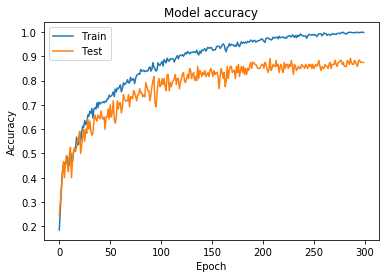

Text(0.5, 1.0, 'Model loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

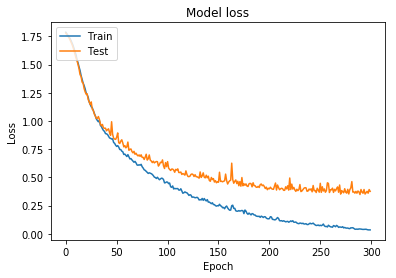

In [11]:
# Solve Here

model2 = Sequential()
model2.add(Dense(200, input_shape = (x_train_pix.shape[1],), activation='relu'))
model2.add(Dense(400, activation='relu'))
model2.add(Dense(600, activation='relu'))
model2.add(Dense(800, activation='relu'))
model2.add(Dense(800, activation='relu'))
model2.add(Dense(600, activation='relu'))
model2.add(Dense(400, activation='relu'))
model2.add(Dense(6, activation='softmax'))

# Compile model
model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.00001), metrics=['accuracy'])
history = model2.fit(x_train_pix, onehotlabels_train, epochs=300, batch_size=100, \
          validation_data=(x_test_pix, onehotlabels_test))

# predict values, calculate accuracy, and create confusion matrix for train and test
train_pred = model.predict_classes(x_train_pix)
test_pred = model.predict_classes(x_test_pix)

model2.evaluate(x_train_pix, onehotlabels_train)
model2.evaluate(x_test_pix, onehotlabels_test)

metrics.confusion_matrix(y_train,train_pred)
metrics.confusion_matrix(y_test,test_pred)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Bonus**

See if you can change some of the parameters so that you can reach for a validation accuracy of at least 92%

Train on 1080 samples, validate on 120 samples
Epoch 1/300
1080/1080 [==============================] - 5s 5ms/step - loss: 7.8944 - acc: 0.1769 - val_loss: 7.8518 - val_acc: 0.2500
Epoch 2/300
1080/1080 [==============================] - 3s 2ms/step - loss: 7.8465 - acc: 0.1685 - val_loss: 7.8044 - val_acc: 0.3000
Epoch 3/300
1080/1080 [==============================] - 2s 2ms/step - loss: 7.8009 - acc: 0.1944 - val_loss: 7.7574 - val_acc: 0.1917
Epoch 4/300
1080/1080 [==============================] - 3s 2ms/step - loss: 7.7502 - acc: 0.1907 - val_loss: 7.7053 - val_acc: 0.3167
Epoch 5/300
1080/1080 [==============================] - 3s 2ms/step - loss: 7.7047 - acc: 0.2037 - val_loss: 7.6543 - val_acc: 0.3583
Epoch 6/300
1080/1080 [==============================] - 2s 2ms/step - loss: 7.6567 - acc: 0.2009 - val_loss: 7.5987 - val_acc: 0.3833
Epoch 7/300
1080/1080 [==============================] - 3s 2ms/step - loss: 7.6112 - acc: 0.2287 - val_loss: 7.5411 - val_acc: 0.3000
Epoch 8/

Epoch 61/300
1080/1080 [==============================] - 2s 2ms/step - loss: 5.1748 - acc: 0.7120 - val_loss: 5.1108 - val_acc: 0.7417
Epoch 62/300
1080/1080 [==============================] - 3s 2ms/step - loss: 5.1724 - acc: 0.7231 - val_loss: 5.2703 - val_acc: 0.6167
Epoch 63/300
1080/1080 [==============================] - 3s 2ms/step - loss: 5.0876 - acc: 0.7435 - val_loss: 5.0645 - val_acc: 0.7500
Epoch 64/300
1080/1080 [==============================] - 3s 2ms/step - loss: 5.0230 - acc: 0.7667 - val_loss: 5.2174 - val_acc: 0.6583
Epoch 65/300
1080/1080 [==============================] - 3s 2ms/step - loss: 5.1877 - acc: 0.7120 - val_loss: 5.0912 - val_acc: 0.7500
Epoch 66/300
1080/1080 [==============================] - 3s 2ms/step - loss: 5.0507 - acc: 0.7361 - val_loss: 4.9835 - val_acc: 0.7667
Epoch 67/300
1080/1080 [==============================] - 3s 2ms/step - loss: 5.0061 - acc: 0.7741 - val_loss: 4.9257 - val_acc: 0.7833
Epoch 68/300
1080/1080 [========================

1080/1080 [==============================] - 2s 2ms/step - loss: 4.0658 - acc: 0.8657 - val_loss: 4.2999 - val_acc: 0.7833
Epoch 122/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.9634 - acc: 0.9037 - val_loss: 4.1801 - val_acc: 0.8333
Epoch 123/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.9583 - acc: 0.8926 - val_loss: 4.0294 - val_acc: 0.8833
Epoch 124/300
1080/1080 [==============================] - 2s 2ms/step - loss: 4.2448 - acc: 0.8148 - val_loss: 4.1505 - val_acc: 0.8000
Epoch 125/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.9366 - acc: 0.9056 - val_loss: 4.0180 - val_acc: 0.8667
Epoch 126/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.8698 - acc: 0.9250 - val_loss: 4.1393 - val_acc: 0.8250
Epoch 127/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.9243 - acc: 0.8926 - val_loss: 4.0565 - val_acc: 0.8333
Epoch 128/300
1080/1080 [==============================

Epoch 181/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.3597 - acc: 0.9630 - val_loss: 3.5761 - val_acc: 0.9333
Epoch 182/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.3178 - acc: 0.9796 - val_loss: 3.5052 - val_acc: 0.8917
Epoch 183/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.5029 - acc: 0.9046 - val_loss: 3.5229 - val_acc: 0.8750
Epoch 184/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.3161 - acc: 0.9796 - val_loss: 3.5736 - val_acc: 0.8917
Epoch 185/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.3089 - acc: 0.9750 - val_loss: 3.5099 - val_acc: 0.9167
Epoch 186/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.2826 - acc: 0.9843 - val_loss: 3.5036 - val_acc: 0.9250
Epoch 187/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.5672 - acc: 0.8944 - val_loss: 4.0651 - val_acc: 0.7417
Epoch 188/300
1080/1080 [================

Epoch 241/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.1500 - acc: 0.9435 - val_loss: 3.2690 - val_acc: 0.9333
Epoch 242/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.1170 - acc: 0.9630 - val_loss: 3.2604 - val_acc: 0.9000
Epoch 243/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.2115 - acc: 0.9259 - val_loss: 3.2957 - val_acc: 0.8750
Epoch 244/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.0996 - acc: 0.9630 - val_loss: 3.2487 - val_acc: 0.9000
Epoch 245/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.1426 - acc: 0.9389 - val_loss: 3.5028 - val_acc: 0.8250
Epoch 246/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.1049 - acc: 0.9556 - val_loss: 3.2326 - val_acc: 0.9167
Epoch 247/300
1080/1080 [==============================] - 2s 2ms/step - loss: 3.0730 - acc: 0.9657 - val_loss: 3.2307 - val_acc: 0.9250
Epoch 248/300
1080/1080 [================

1080/1080 [==============================] - 1s 948us/step


[2.8595238438359014, 0.9833333333333333]

120/120 [==============================] - 0s 975us/step


[3.042806339263916, 0.9166666706403096]

array([[ 14,   0,  55, 111,   0,   0],
       [ 43,   0,  32, 105,   0,   0],
       [ 13,   0,  81,  86,   0,   0],
       [  0,   0,   1, 179,   0,   0],
       [  5,   0,  50, 125,   0,   0],
       [  9,   0,  23, 148,   0,   0]], dtype=int64)

array([[ 0,  0,  4, 16,  0,  0],
       [ 3,  0,  3, 14,  0,  0],
       [ 2,  0,  9,  9,  0,  0],
       [ 0,  0,  0, 20,  0,  0],
       [ 0,  0,  5, 15,  0,  0],
       [ 0,  0,  6, 14,  0,  0]], dtype=int64)

Text(0.5, 1.0, 'Model accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

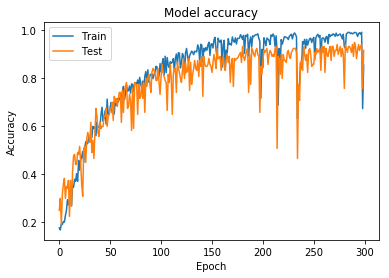

Text(0.5, 1.0, 'Model loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

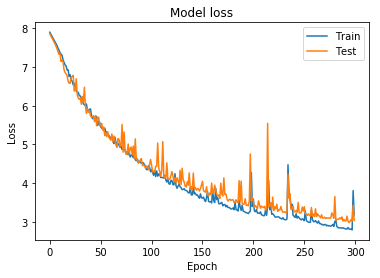

In [14]:
# created 3 additional models
# model3 (below) reached 95% validation accuracy on epoch 291/300
# however it finished at only 91.67%
from keras import regularizers, layers, activations

model3 = Sequential()
model3.add(Dense(700, kernel_regularizer=regularizers.l2(0.001), input_shape = (x_train_pix.shape[1],), activation='relu'))
model3.add(layers.Dropout(0.1))
model3.add(Dense(700, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model3.add(layers.Dropout(0.1))
model3.add(Dense(900, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model3.add(layers.Dropout(0.1))
model3.add(Dense(900, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model3.add(layers.Dropout(0.1))
model3.add(Dense(900, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model3.add(layers.Dropout(0.1))
model3.add(Dense(700, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model3.add(layers.Dropout(0.1))
model3.add(Dense(700, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model3.add(layers.Dropout(0.1))
model3.add(Dense(6, kernel_regularizer=regularizers.l2(0.001),activation='softmax'))

# Compile model
model3.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Nadam(lr=0.000025), metrics=['accuracy'])
history = model3.fit(x_train_pix, onehotlabels_train, epochs=300, batch_size=100, \
          validation_data=(x_test_pix, onehotlabels_test))

# predict values, calculate accuracy, and create confusion matrix for train and test
train_pred = model.predict_classes(x_train_pix)
test_pred = model.predict_classes(x_test_pix)

model3.evaluate(x_train_pix, onehotlabels_train)
model3.evaluate(x_test_pix, onehotlabels_test)

metrics.confusion_matrix(y_train,train_pred)
metrics.confusion_matrix(y_test,test_pred)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 1080 samples, validate on 120 samples
Epoch 1/300
1080/1080 [==============================] - 6s 5ms/step - loss: 8.1206 - acc: 0.1574 - val_loss: 8.0948 - val_acc: 0.1833
Epoch 2/300
1080/1080 [==============================] - 3s 2ms/step - loss: 8.0990 - acc: 0.1639 - val_loss: 8.0729 - val_acc: 0.2917
Epoch 3/300
1080/1080 [==============================] - 3s 2ms/step - loss: 8.0772 - acc: 0.1759 - val_loss: 8.0508 - val_acc: 0.2917
Epoch 4/300
1080/1080 [==============================] - 3s 2ms/step - loss: 8.0512 - acc: 0.1870 - val_loss: 8.0256 - val_acc: 0.3083
Epoch 5/300
1080/1080 [==============================] - 3s 2ms/step - loss: 8.0348 - acc: 0.1852 - val_loss: 8.0029 - val_acc: 0.3667
Epoch 6/300
1080/1080 [==============================] - 3s 2ms/step - loss: 8.0164 - acc: 0.1944 - val_loss: 7.9813 - val_acc: 0.3417
Epoch 7/300
1080/1080 [==============================] - 3s 2ms/step - loss: 7.9826 - acc: 0.2472 - val_loss: 7.9528 - val_acc: 0.3750
Epoch 8/

Epoch 61/300
1080/1080 [==============================] - 3s 2ms/step - loss: 6.4631 - acc: 0.6167 - val_loss: 6.3454 - val_acc: 0.6667
Epoch 62/300
1080/1080 [==============================] - 3s 2ms/step - loss: 6.3706 - acc: 0.6676 - val_loss: 6.4252 - val_acc: 0.6500
Epoch 63/300
1080/1080 [==============================] - 3s 2ms/step - loss: 6.3896 - acc: 0.6685 - val_loss: 6.2723 - val_acc: 0.7083
Epoch 64/300
1080/1080 [==============================] - 3s 2ms/step - loss: 6.3537 - acc: 0.6657 - val_loss: 6.2715 - val_acc: 0.6667
Epoch 65/300
1080/1080 [==============================] - 3s 2ms/step - loss: 6.3423 - acc: 0.6593 - val_loss: 6.2838 - val_acc: 0.6750
Epoch 66/300
1080/1080 [==============================] - 3s 2ms/step - loss: 6.3570 - acc: 0.6491 - val_loss: 6.3230 - val_acc: 0.6750
Epoch 67/300
1080/1080 [==============================] - 3s 2ms/step - loss: 6.3064 - acc: 0.6620 - val_loss: 6.2202 - val_acc: 0.6917
Epoch 68/300
1080/1080 [========================

1080/1080 [==============================] - 3s 2ms/step - loss: 5.4266 - acc: 0.8500 - val_loss: 5.5651 - val_acc: 0.7833
Epoch 122/300
1080/1080 [==============================] - 3s 2ms/step - loss: 5.3973 - acc: 0.8528 - val_loss: 5.4154 - val_acc: 0.8167
Epoch 123/300
1080/1080 [==============================] - 3s 2ms/step - loss: 5.4208 - acc: 0.8278 - val_loss: 5.6529 - val_acc: 0.7917
Epoch 124/300
1080/1080 [==============================] - 3s 2ms/step - loss: 5.3901 - acc: 0.8426 - val_loss: 5.5293 - val_acc: 0.7833
Epoch 125/300
1080/1080 [==============================] - 3s 2ms/step - loss: 5.3760 - acc: 0.8491 - val_loss: 5.6974 - val_acc: 0.7083
Epoch 126/300
1080/1080 [==============================] - 3s 2ms/step - loss: 5.3402 - acc: 0.8583 - val_loss: 5.4568 - val_acc: 0.8083
Epoch 127/300
1080/1080 [==============================] - 3s 2ms/step - loss: 5.3450 - acc: 0.8500 - val_loss: 5.5032 - val_acc: 0.8000
Epoch 128/300
1080/1080 [==============================

Epoch 181/300
1080/1080 [==============================] - 3s 2ms/step - loss: 4.8018 - acc: 0.9222 - val_loss: 4.9724 - val_acc: 0.8333
Epoch 182/300
1080/1080 [==============================] - 2s 2ms/step - loss: 4.7691 - acc: 0.9343 - val_loss: 5.1322 - val_acc: 0.8333
Epoch 183/300
1080/1080 [==============================] - 3s 2ms/step - loss: 4.7559 - acc: 0.9481 - val_loss: 4.9828 - val_acc: 0.8667
Epoch 184/300
1080/1080 [==============================] - 2s 2ms/step - loss: 4.7345 - acc: 0.9463 - val_loss: 4.9300 - val_acc: 0.8583
Epoch 185/300
1080/1080 [==============================] - 3s 2ms/step - loss: 4.7247 - acc: 0.9472 - val_loss: 4.9427 - val_acc: 0.9083
Epoch 186/300
1080/1080 [==============================] - 3s 2ms/step - loss: 4.8549 - acc: 0.8889 - val_loss: 4.9453 - val_acc: 0.8667
Epoch 187/300
1080/1080 [==============================] - 2s 2ms/step - loss: 4.7158 - acc: 0.9528 - val_loss: 4.9763 - val_acc: 0.8583
Epoch 188/300
1080/1080 [================

Epoch 241/300
1080/1080 [==============================] - 2s 2ms/step - loss: 4.3612 - acc: 0.9741 - val_loss: 4.5752 - val_acc: 0.9083
Epoch 242/300
1080/1080 [==============================] - 3s 2ms/step - loss: 4.3345 - acc: 0.9880 - val_loss: 4.5373 - val_acc: 0.9333
Epoch 243/300
1080/1080 [==============================] - 2s 2ms/step - loss: 4.3285 - acc: 0.9861 - val_loss: 4.6168 - val_acc: 0.9083
Epoch 244/300
1080/1080 [==============================] - 2s 2ms/step - loss: 4.3339 - acc: 0.9833 - val_loss: 4.5786 - val_acc: 0.9083
Epoch 245/300
1080/1080 [==============================] - 2s 2ms/step - loss: 4.3255 - acc: 0.9796 - val_loss: 4.5948 - val_acc: 0.9167
Epoch 246/300
1080/1080 [==============================] - 2s 2ms/step - loss: 4.3235 - acc: 0.9824 - val_loss: 4.5650 - val_acc: 0.9000
Epoch 247/300
1080/1080 [==============================] - 2s 2ms/step - loss: 4.3213 - acc: 0.9806 - val_loss: 4.6003 - val_acc: 0.8750
Epoch 248/300
1080/1080 [================

1080/1080 [==============================] - 1s 966us/step


[4.023418666698315, 1.0]

120/120 [==============================] - 0s 1ms/step


[4.3268119176228845, 0.925000003973643]

array([[ 14,   0,  55, 111,   0,   0],
       [ 43,   0,  32, 105,   0,   0],
       [ 13,   0,  81,  86,   0,   0],
       [  0,   0,   1, 179,   0,   0],
       [  5,   0,  50, 125,   0,   0],
       [  9,   0,  23, 148,   0,   0]], dtype=int64)

array([[ 0,  0,  4, 16,  0,  0],
       [ 3,  0,  3, 14,  0,  0],
       [ 2,  0,  9,  9,  0,  0],
       [ 0,  0,  0, 20,  0,  0],
       [ 0,  0,  5, 15,  0,  0],
       [ 0,  0,  6, 14,  0,  0]], dtype=int64)

Text(0.5, 1.0, 'Model accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

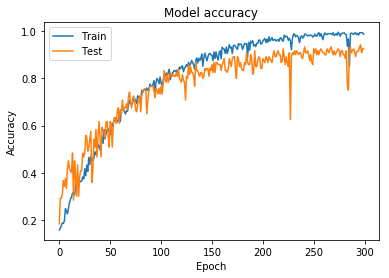

Text(0.5, 1.0, 'Model loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

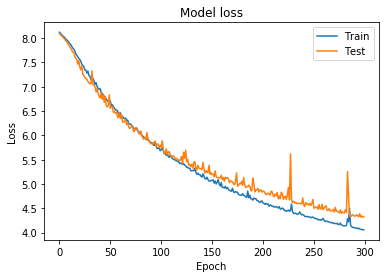

In [17]:
# model4 (below) reached 92.5% validation accuracy 
from keras import regularizers, layers, activations

model4 = Sequential()
model4.add(Dense(700, kernel_regularizer=regularizers.l2(0.001), input_shape = (x_train_pix.shape[1],), activation='relu'))
model4.add(layers.Dropout(0.1))
model4.add(Dense(800, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model4.add(layers.Dropout(0.1))
model4.add(Dense(900, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model4.add(layers.Dropout(0.1))
model4.add(Dense(900, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model4.add(layers.Dropout(0.1))
model4.add(Dense(900, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model4.add(layers.Dropout(0.1))
model4.add(Dense(800, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model4.add(layers.Dropout(0.1))
model4.add(Dense(700, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model4.add(layers.Dropout(0.1))
model4.add(Dense(6, kernel_regularizer=regularizers.l2(0.001),activation='softmax'))

# Compile model
model4.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Nadam(lr=0.000009), metrics=['accuracy'])
history = model4.fit(x_train_pix, onehotlabels_train, epochs=300, batch_size=100, \
          validation_data=(x_test_pix, onehotlabels_test))

# predict values, calculate accuracy, and create confusion matrix for train and test
train_pred = model.predict_classes(x_train_pix)
test_pred = model.predict_classes(x_test_pix)

model4.evaluate(x_train_pix, onehotlabels_train)
model4.evaluate(x_test_pix, onehotlabels_test)

metrics.confusion_matrix(y_train,train_pred)
metrics.confusion_matrix(y_test,test_pred)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 1080 samples, validate on 120 samples
Epoch 1/500
1080/1080 [==============================] - 6s 6ms/step - loss: 8.1302 - acc: 0.1796 - val_loss: 8.1091 - val_acc: 0.1833
Epoch 2/500
1080/1080 [==============================] - 3s 2ms/step - loss: 8.1208 - acc: 0.1667 - val_loss: 8.0937 - val_acc: 0.1583
Epoch 3/500
1080/1080 [==============================] - 3s 2ms/step - loss: 8.0932 - acc: 0.1852 - val_loss: 8.0788 - val_acc: 0.2000
Epoch 4/500
1080/1080 [==============================] - 3s 2ms/step - loss: 8.0908 - acc: 0.1657 - val_loss: 8.0675 - val_acc: 0.2000
Epoch 5/500
1080/1080 [==============================] - 3s 2ms/step - loss: 8.0770 - acc: 0.1759 - val_loss: 8.0545 - val_acc: 0.2000
Epoch 6/500
1080/1080 [==============================] - 3s 2ms/step - loss: 8.0639 - acc: 0.1519 - val_loss: 8.0413 - val_acc: 0.2250
Epoch 7/500
1080/1080 [==============================] - 3s 2ms/step - loss: 8.0549 - acc: 0.1824 - val_loss: 8.0276 - val_acc: 0.2750
Epoch 8/

Epoch 61/500
1080/1080 [==============================] - 3s 2ms/step - loss: 7.2639 - acc: 0.3694 - val_loss: 7.1132 - val_acc: 0.3667
Epoch 62/500
1080/1080 [==============================] - 3s 2ms/step - loss: 7.2418 - acc: 0.3528 - val_loss: 7.0940 - val_acc: 0.3667
Epoch 63/500
1080/1080 [==============================] - 3s 2ms/step - loss: 7.2242 - acc: 0.3611 - val_loss: 7.0818 - val_acc: 0.4000
Epoch 64/500
1080/1080 [==============================] - 3s 2ms/step - loss: 7.1845 - acc: 0.3935 - val_loss: 7.0086 - val_acc: 0.4500
Epoch 65/500
1080/1080 [==============================] - 3s 2ms/step - loss: 7.1582 - acc: 0.3880 - val_loss: 6.9900 - val_acc: 0.4083
Epoch 66/500
1080/1080 [==============================] - 3s 2ms/step - loss: 7.1409 - acc: 0.3833 - val_loss: 6.9898 - val_acc: 0.4417
Epoch 67/500
1080/1080 [==============================] - 3s 2ms/step - loss: 7.1385 - acc: 0.3898 - val_loss: 6.9526 - val_acc: 0.4917
Epoch 68/500
1080/1080 [========================

1080/1080 [==============================] - 3s 2ms/step - loss: 6.1373 - acc: 0.6370 - val_loss: 6.0796 - val_acc: 0.6583
Epoch 122/500
1080/1080 [==============================] - 3s 2ms/step - loss: 6.1122 - acc: 0.6398 - val_loss: 6.0933 - val_acc: 0.6333
Epoch 123/500
1080/1080 [==============================] - 3s 2ms/step - loss: 6.1041 - acc: 0.6528 - val_loss: 6.0102 - val_acc: 0.6500
Epoch 124/500
1080/1080 [==============================] - 3s 2ms/step - loss: 6.1198 - acc: 0.6481 - val_loss: 6.0462 - val_acc: 0.6333
Epoch 125/500
1080/1080 [==============================] - 3s 2ms/step - loss: 6.0686 - acc: 0.6546 - val_loss: 6.0141 - val_acc: 0.6667
Epoch 126/500
1080/1080 [==============================] - 3s 2ms/step - loss: 6.0667 - acc: 0.6694 - val_loss: 6.1413 - val_acc: 0.6417
Epoch 127/500
1080/1080 [==============================] - 3s 2ms/step - loss: 6.0547 - acc: 0.6685 - val_loss: 5.9809 - val_acc: 0.6417
Epoch 128/500
1080/1080 [==============================

Epoch 181/500
1080/1080 [==============================] - 3s 2ms/step - loss: 5.4438 - acc: 0.7935 - val_loss: 5.4221 - val_acc: 0.8083
Epoch 182/500
1080/1080 [==============================] - 3s 2ms/step - loss: 5.4259 - acc: 0.7917 - val_loss: 5.5007 - val_acc: 0.7583
Epoch 183/500
1080/1080 [==============================] - 3s 2ms/step - loss: 5.4054 - acc: 0.7954 - val_loss: 5.4130 - val_acc: 0.8167
Epoch 184/500
1080/1080 [==============================] - 3s 2ms/step - loss: 5.4128 - acc: 0.8019 - val_loss: 5.6201 - val_acc: 0.7667
Epoch 185/500
1080/1080 [==============================] - 3s 2ms/step - loss: 5.4029 - acc: 0.8102 - val_loss: 5.4158 - val_acc: 0.8000
Epoch 186/500
1080/1080 [==============================] - 3s 2ms/step - loss: 5.3946 - acc: 0.8019 - val_loss: 5.3840 - val_acc: 0.8167
Epoch 187/500
1080/1080 [==============================] - 3s 2ms/step - loss: 5.3588 - acc: 0.8093 - val_loss: 5.3937 - val_acc: 0.8083
Epoch 188/500
1080/1080 [================

Epoch 241/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.8586 - acc: 0.9269 - val_loss: 4.9839 - val_acc: 0.8750
Epoch 242/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.9199 - acc: 0.8787 - val_loss: 4.9761 - val_acc: 0.8833
Epoch 243/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.8749 - acc: 0.9037 - val_loss: 4.9752 - val_acc: 0.8833
Epoch 244/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.8719 - acc: 0.9037 - val_loss: 4.9429 - val_acc: 0.8833
Epoch 245/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.8470 - acc: 0.9130 - val_loss: 5.1329 - val_acc: 0.8083
Epoch 246/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.8639 - acc: 0.9028 - val_loss: 4.9873 - val_acc: 0.8250
Epoch 247/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.8325 - acc: 0.9120 - val_loss: 4.9645 - val_acc: 0.8583
Epoch 248/500
1080/1080 [================

Epoch 301/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.4817 - acc: 0.9583 - val_loss: 4.6827 - val_acc: 0.8917
Epoch 302/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.4812 - acc: 0.9602 - val_loss: 4.6811 - val_acc: 0.9167
Epoch 303/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.4836 - acc: 0.9519 - val_loss: 4.6278 - val_acc: 0.9000
Epoch 304/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.4998 - acc: 0.9398 - val_loss: 4.7059 - val_acc: 0.8750
Epoch 305/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.4749 - acc: 0.9546 - val_loss: 4.6553 - val_acc: 0.8833
Epoch 306/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.4538 - acc: 0.9648 - val_loss: 4.6955 - val_acc: 0.8833
Epoch 307/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.4826 - acc: 0.9491 - val_loss: 4.6130 - val_acc: 0.9167
Epoch 308/500
1080/1080 [================

Epoch 361/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.2224 - acc: 0.9685 - val_loss: 4.3970 - val_acc: 0.9167
Epoch 362/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.1746 - acc: 0.9806 - val_loss: 4.3717 - val_acc: 0.9167
Epoch 363/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.1891 - acc: 0.9722 - val_loss: 4.4100 - val_acc: 0.8917
Epoch 364/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.1729 - acc: 0.9759 - val_loss: 4.4918 - val_acc: 0.8750
Epoch 365/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.1853 - acc: 0.9741 - val_loss: 4.4033 - val_acc: 0.9083
Epoch 366/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.1649 - acc: 0.9778 - val_loss: 4.4450 - val_acc: 0.9000
Epoch 367/500
1080/1080 [==============================] - 3s 2ms/step - loss: 4.1650 - acc: 0.9750 - val_loss: 4.3907 - val_acc: 0.8917
Epoch 368/500
1080/1080 [================

Epoch 421/500
1080/1080 [==============================] - 3s 2ms/step - loss: 3.9337 - acc: 0.9861 - val_loss: 4.1620 - val_acc: 0.9250
Epoch 422/500
1080/1080 [==============================] - 2s 2ms/step - loss: 3.9257 - acc: 0.9843 - val_loss: 4.1466 - val_acc: 0.9250
Epoch 423/500
1080/1080 [==============================] - 3s 2ms/step - loss: 3.9388 - acc: 0.9759 - val_loss: 4.1576 - val_acc: 0.9250
Epoch 424/500
1080/1080 [==============================] - 3s 2ms/step - loss: 3.9237 - acc: 0.9852 - val_loss: 4.2082 - val_acc: 0.8917
Epoch 425/500
1080/1080 [==============================] - 2s 2ms/step - loss: 3.9205 - acc: 0.9870 - val_loss: 4.2170 - val_acc: 0.9167
Epoch 426/500
1080/1080 [==============================] - 3s 2ms/step - loss: 3.9041 - acc: 0.9917 - val_loss: 4.2317 - val_acc: 0.8667
Epoch 427/500
1080/1080 [==============================] - 2s 2ms/step - loss: 3.9011 - acc: 0.9917 - val_loss: 4.1447 - val_acc: 0.9167
Epoch 428/500
1080/1080 [================

Epoch 481/500
1080/1080 [==============================] - 3s 2ms/step - loss: 3.6972 - acc: 0.9917 - val_loss: 3.9345 - val_acc: 0.9250
Epoch 482/500
1080/1080 [==============================] - 2s 2ms/step - loss: 3.6860 - acc: 0.9963 - val_loss: 3.9741 - val_acc: 0.9250
Epoch 483/500
1080/1080 [==============================] - 2s 2ms/step - loss: 3.6889 - acc: 0.9926 - val_loss: 3.9625 - val_acc: 0.9250
Epoch 484/500
1080/1080 [==============================] - 2s 2ms/step - loss: 3.6800 - acc: 0.9954 - val_loss: 3.9323 - val_acc: 0.9167
Epoch 485/500
1080/1080 [==============================] - 2s 2ms/step - loss: 3.6739 - acc: 0.9963 - val_loss: 4.0151 - val_acc: 0.9250
Epoch 486/500
1080/1080 [==============================] - 2s 2ms/step - loss: 3.6859 - acc: 0.9880 - val_loss: 3.9324 - val_acc: 0.9167
Epoch 487/500
1080/1080 [==============================] - 3s 2ms/step - loss: 3.6762 - acc: 0.9917 - val_loss: 3.9356 - val_acc: 0.9167
Epoch 488/500
1080/1080 [================

[3.59634092119005, 1.0]

120/120 [==============================] - 0s 967us/step


[3.9173765500386555, 0.925000003973643]

array([[ 14,   0,  55, 111,   0,   0],
       [ 43,   0,  32, 105,   0,   0],
       [ 13,   0,  81,  86,   0,   0],
       [  0,   0,   1, 179,   0,   0],
       [  5,   0,  50, 125,   0,   0],
       [  9,   0,  23, 148,   0,   0]], dtype=int64)

array([[ 0,  0,  4, 16,  0,  0],
       [ 3,  0,  3, 14,  0,  0],
       [ 2,  0,  9,  9,  0,  0],
       [ 0,  0,  0, 20,  0,  0],
       [ 0,  0,  5, 15,  0,  0],
       [ 0,  0,  6, 14,  0,  0]], dtype=int64)

Text(0.5, 1.0, 'Model accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

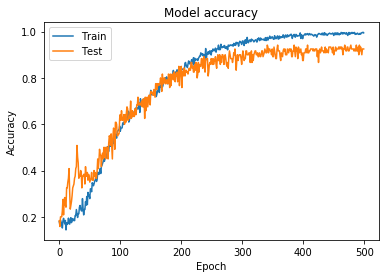

Text(0.5, 1.0, 'Model loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

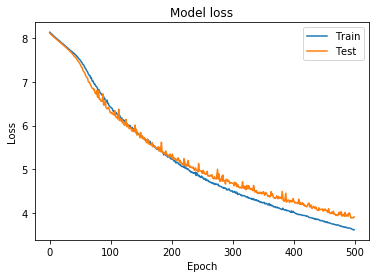

In [19]:
# model5 (below) reached 92.5% validation accuracy
# PLEASE USE THIS FOR THE BONUS POINTS    
from keras import regularizers, layers, activations

model5 = Sequential()
model5.add(Dense(700, kernel_regularizer=regularizers.l2(0.001), input_shape = (x_train_pix.shape[1],), activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(800, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(900, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(900, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(900, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(800, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(700, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(6, kernel_regularizer=regularizers.l2(0.001),activation='softmax'))

# Compile model
model5.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Nadam(lr=0.0000075), metrics=['accuracy'])
history = model5.fit(x_train_pix, onehotlabels_train, epochs=500, batch_size=100, \
          validation_data=(x_test_pix, onehotlabels_test))

# predict values, calculate accuracy, and create confusion matrix for train and test
train_pred = model.predict_classes(x_train_pix)
test_pred = model.predict_classes(x_test_pix)

model5.evaluate(x_train_pix, onehotlabels_train)
model5.evaluate(x_test_pix, onehotlabels_test)

metrics.confusion_matrix(y_train,train_pred)
metrics.confusion_matrix(y_test,test_pred)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()